## FasionMnist
#### tring to classify between 28x28 pictures of 10 different types of clothing
####  refering to each pixle's 'grayscle' value as a feature

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from random import shuffle
import copy
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.cluster import k_means
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns

### PreProssesing

In [3]:
train = pd.read_csv(r'C:\Users\ישראל\DS\DataVisuallisition\fashion-mnist_train.csv\fashion-mnist_train.csv')
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape

(60000, 785)

In [4]:
target = train.label
train.drop('label', axis = 1, inplace = True)

In [22]:
label_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
label_table = pd.DataFrame(pd.Series(label_dict).rename('labels'), range(10))
label_table

,labels
0,T-shirt/top
1,Trouser
2,Pullover
3,Dress
4,Coat
5,Sandal
6,Shirt
7,Sneaker
8,Bag
9,Ankle boot


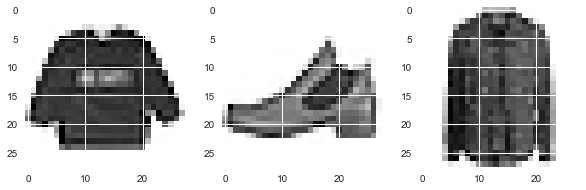

In [25]:
#this what the instances look like:
plt.figure(figsize = (10,10))
plt.subplot(3,3,1)
plt.imshow(np.array(train.iloc[0]).reshape(28, 28))
plt.subplot(3,3,2)
plt.imshow(np.array(train.iloc[1]).reshape(28, 28))
plt.subplot(3,3,3)
plt.imshow(np.array(train.iloc[2]).reshape(28, 28))
plt.show()

In [26]:
s = StandardScaler()
train = pd.DataFrame(s.fit_transform(train))

clustering with k_means different 4x4 parts of the picture

In [27]:
labels = []
subparts = []
lister = list(range(train.shape[1]))
rows = np.sqrt(train.shape[1]) # the side lenght of each picture

n = 0
for i in range(0, int(rows), 4): #different subparts of the picture(4x4 matrixes)
    for j in range(0, int(rows), 4):
        
        pixles = []
        for I in lister[i:i+4]:
            for J in lister[j:j+4]:
                pixles.append(int(I + (J*rows)))
        
        
        subparts.append(pixles)
        x = train[pixles].copy()
        clusterer = k_means(x, 10, n_jobs = -1)
        labels.append(pd.Series(clusterer[1]).rename('clus' + str(len(list(train.columns)) + n)).reset_index(drop = True))
        n +=1
        
results = pd.concat(labels, axis = 1)
train = pd.concat([train, results], axis = 1)        
train.head()

,0,1,2,3,4,5,6,7,8,9,...,clus823,clus824,clus825,clus826,clus827,clus828,clus829,clus830,clus831,clus832
0,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,9,3,0,0,0,0,4,7,1,0
1,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,1,9,0,0,0,1,4,1,4,0
2,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,0.198798,-0.238546,-0.377959,...,3,2,8,0,0,0,1,0,1,0
3,-0.009505,-0.022693,-0.028907,0.366132,0.406799,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,4,5,3,0,7,9,1,0,1,0
4,-0.009505,-0.022693,-0.028907,-0.041557,-0.057575,-0.070503,-0.098084,-0.155981,-0.238546,-0.377959,...,2,1,0,0,0,0,1,0,1,0


PrincapleComponantAnalsis

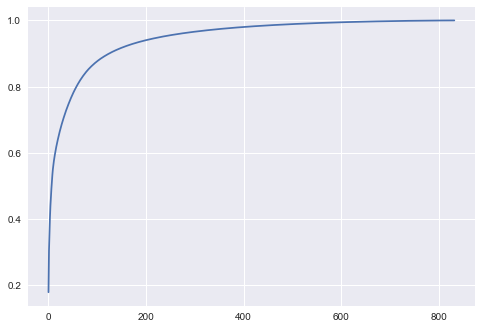

In [28]:
pca = PCA()
pca.fit(train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

In [29]:
cumsum[100]

0.8769938144189566

In [30]:
pca = PCA(120)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.1, random_state = 12)

X_train = s.fit_transform(X_train)
X_test = s.transform(X_test)# doesnt refit

In [32]:
X_train = pd.DataFrame(pca.fit_transform(X_train))
X_test = pd.DataFrame(pca.transform(X_test))# doesnt refit

In [33]:
X_train.shape

(54000, 120)

### Applying The Models

In [51]:
#baceline preformance
dummy = DummyClassifier(strategy = 'stratified')
dummy.fit(X_train, y_train)
metrics.accuracy_score(y_test, dummy.predict(X_test))

0.099

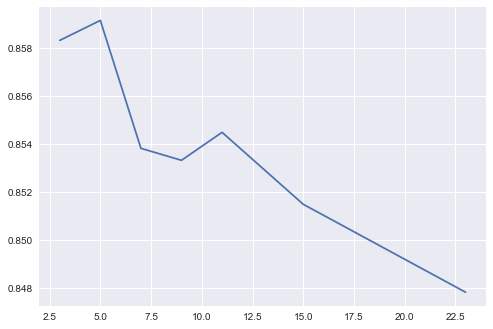

0.8591666666666666


In [56]:
scores =[]
K_range = [3,5,7,9,11,13,15,23]
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)
    knn.fit(X_train, y_train)
    scores.append(metrics.accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(K_range, scores)
plt.grid(True)
plt.show()
print(max(scores))

In [57]:
knn = KNeighborsClassifier(n_neighbors = 5, n_jobs = -1, weights = 'distance')
knn.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn.predict(X_test))

0.8605

In [58]:
Knn = BaggingClassifier(knn)

grid = {'n_estimators': [10,15,20,25], 'max_features': [20,40,60]}

G = GridSearchCV(Knn, grid, cv = 4, n_jobs = -1)
G.fit(X_train, y_train)
y_pred = G.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8698333333333333

In [61]:
results_knn = pd.DataFrame(G.cv_results_)
results_knn.mean_test_score.sort_values(ascending = False).nlargest(6)

7     0.868815
6     0.867667
10    0.867222
11    0.866981
9     0.866630
8     0.866093
Name: mean_test_score, dtype: float64

In [62]:
G.best_params_

{'max_features': 40, 'n_estimators': 25}

In [63]:
Knn = BaggingClassifier(knn, n_estimators = 30, max_features = 40, n_jobs = -1)
Knn.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_jobs=-1,
                                                      weights='distance'),
                  max_features=40, n_estimators=30, n_jobs=-1)

In [67]:
bt = GradientBoostingClassifier(n_estimators = 200, learning_rate = 0.2, min_samples_split = 20)
bt.fit(X_train, y_train)
metrics.accuracy_score(y_test, bt.predict(X_test))

0.8581666666666666

In [68]:
rf = RandomForestClassifier(n_estimators = 250)

grid = {'min_samples_split': [20,30], 'max_features':[1.0, 40, 30]}

G = GridSearchCV(rf, grid, cv = 4, n_jobs = -1)
G.fit(X_train, y_train)
metrics.accuracy_score(y_test, G.predict(X_test))

0.8528333333333333

In [70]:
results_rf = pd.DataFrame(G.cv_results_)
results_rf.mean_test_score.sort_values(ascending = False)

4    0.860519
2    0.860389
3    0.857130
5    0.856889
0    0.851130
1    0.847926
Name: mean_test_score, dtype: float64

In [71]:
G.best_params_

{'max_features': 30, 'min_samples_split': 20}

In [72]:
RF = RandomForestClassifier(n_estimators = 250, max_features = 30, min_samples_split = 20, n_jobs = -1)
RF.fit(X_train, y_train)

RandomForestClassifier(max_features=30, min_samples_split=20, n_estimators=250,
                       n_jobs=-1)

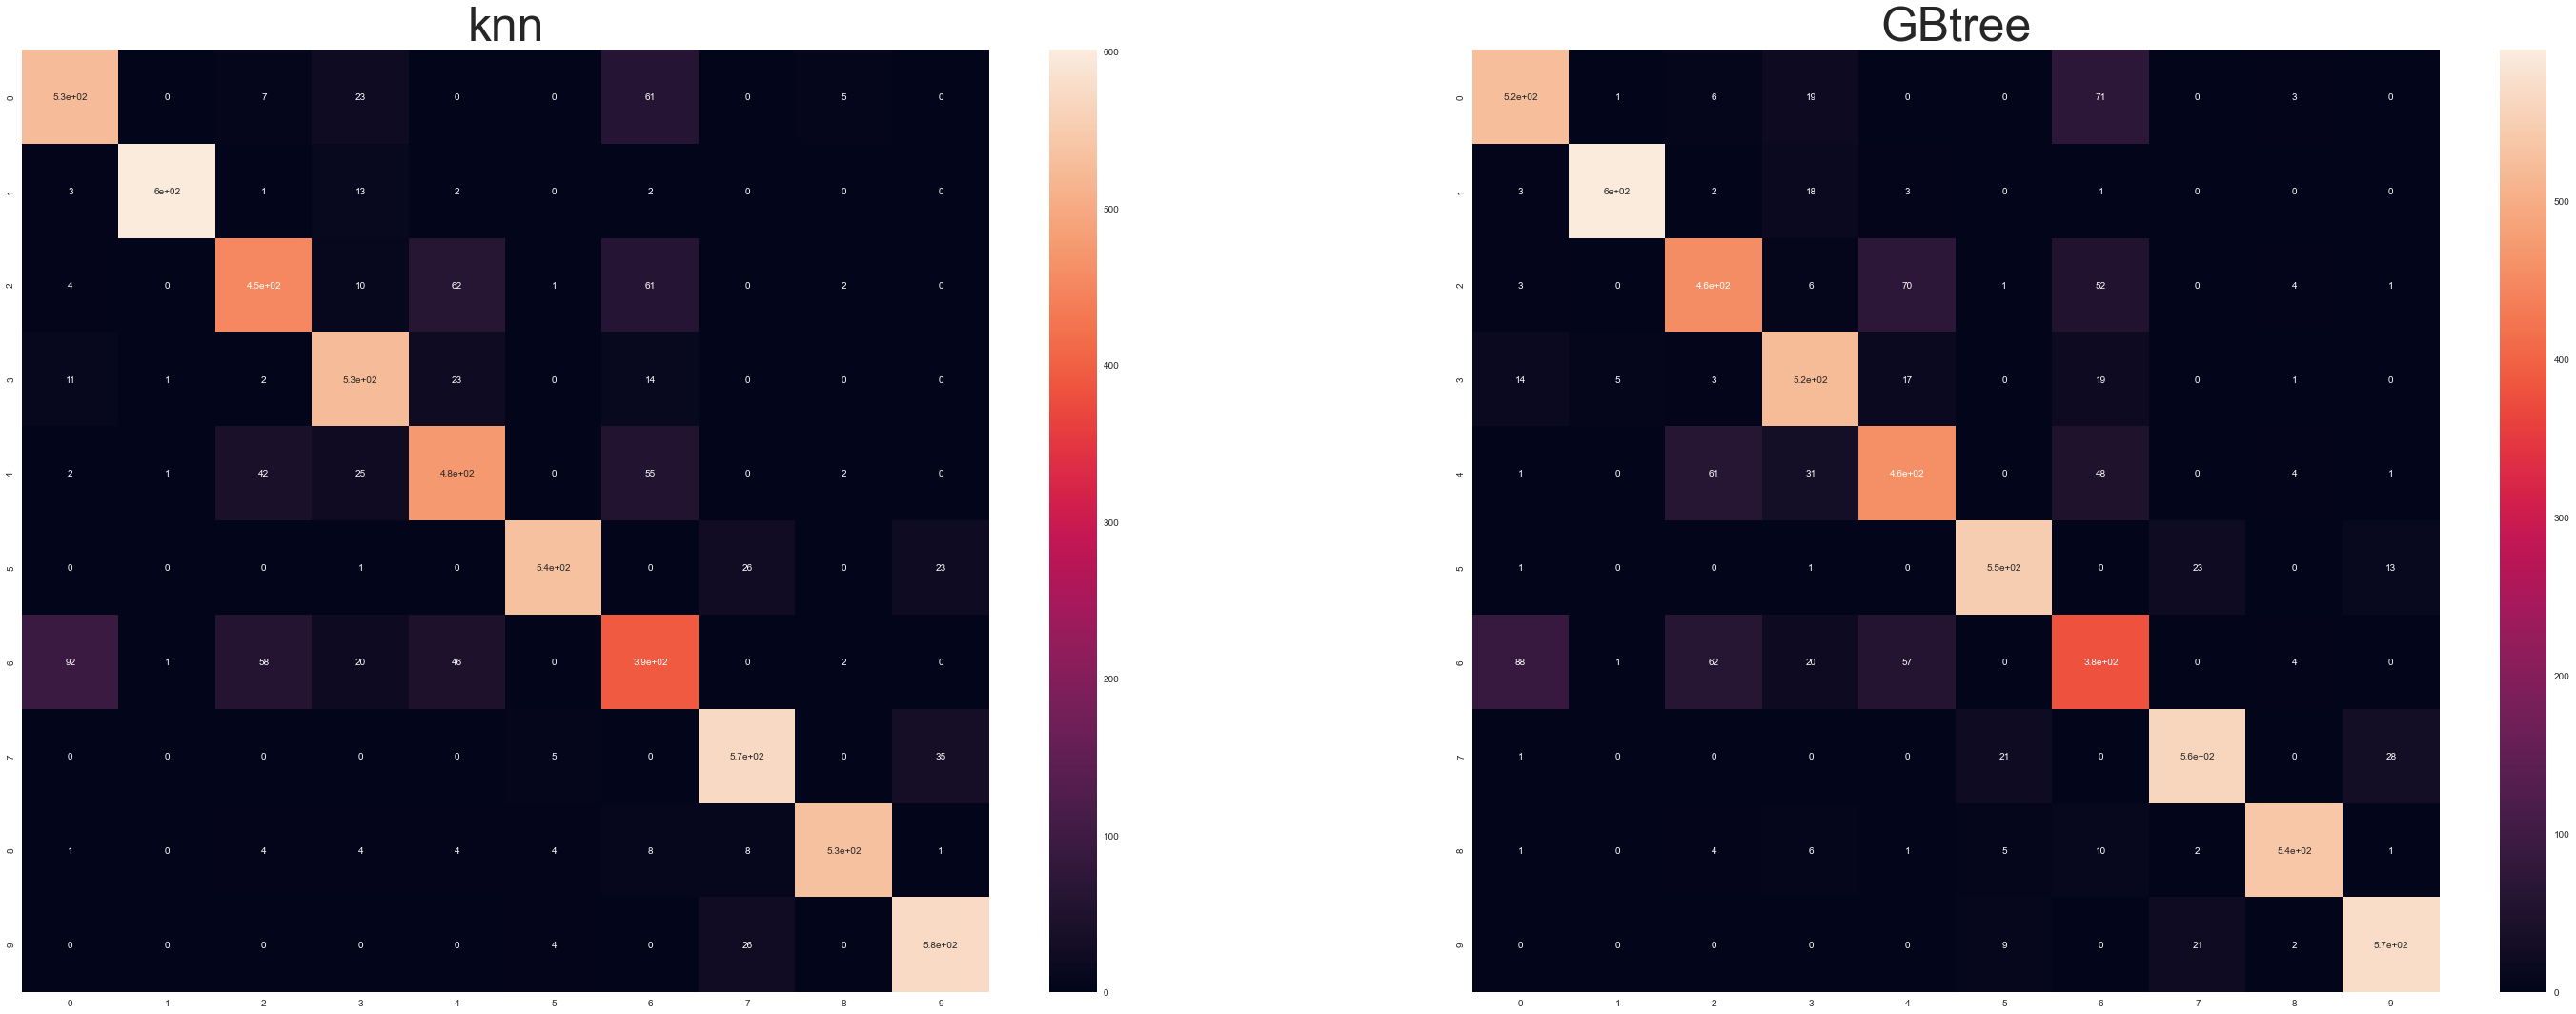

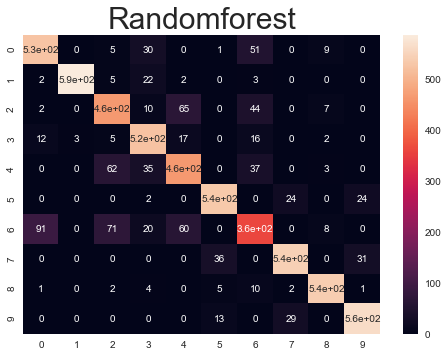

In [82]:
plt.figure(figsize = (50, 40))
plt.subplot(2,2,1)
plt.title('knn', fontdict = {'size': 50})
sns.heatmap(metrics.confusion_matrix(y_test, Knn.predict(X_test)), annot = True)
plt.subplot(2,2,2)
plt.title('GBtree', fontdict = {'size': 50})
sns.heatmap(metrics.confusion_matrix(y_test, bt.predict(X_test)), annot = True)
plt.show()
sns.heatmap(metrics.confusion_matrix(y_test, RF.predict(X_test)), annot = True)
plt.title('Randomforest', fontdict = {'size': 30})
plt.show()

In [ ]:
estimators = list(zip(['knn', 'GBt', 'RF'], [Knn, bt, RF]))

sc = StackingClassifier(estimators, final_estimator = BernoulliNB())
sc.fit(X_train, y_train)
y_pred = sc.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

In [ ]:
#lr
#pass...
#diclaier final results...